In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
#Data Generation
# data generate X,Y
m = 100
X = np.random.randn(m)

print(X)

[ 0.46371968  0.47618487 -1.67394928 -0.06867556  1.20723467  1.88520815
  0.40371194  1.02727348 -2.49679287 -1.06359387  0.96825577  0.47675431
 -0.15854551 -0.64731346 -1.41982559 -0.03307282  1.77190134 -1.05980388
  0.05993703  2.07612293 -0.49743486  0.05936788  0.7713523  -0.66920404
 -0.80913041  0.56773616  0.18251455  0.55752369 -0.48641094  0.31218276
 -0.41747498  0.81574887  0.60204601 -0.173486    1.84853095 -0.98563819
 -2.14145133 -1.09607762 -0.33760364  0.36802086  1.47215426  0.72806967
 -1.12784581  1.19458832  0.12141399 -1.03152889 -0.62863129 -1.0030599
 -0.03634627 -1.10726949  1.26693701  0.01024055  0.78565601 -0.97242337
  0.08166014 -1.68749164  0.10951937  1.08560791 -0.45063312 -1.43838525
  0.48129231  0.41058296 -0.8595417   0.15743146 -0.26823759  0.23534033
  0.81041793 -0.945357    1.41144731  0.438024    0.2555646  -2.28818066
  0.69081647  0.25955139  0.08570874 -0.34284634  1.92905524  0.25433155
  0.6474096   0.37483152 -0.56054671  1.47678791  1.

In [8]:
# data generate X,Y
m = 100
X = np.random.randn(m) * 10

print(X.mean(), X.std())

-1.3560473158074675 10.67185880934507


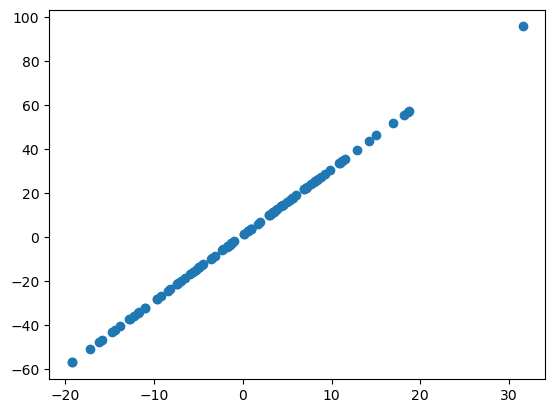

In [10]:
# data generate X,Y
m = 100
X = np.random.randn(m) * 10
Y = 3*X + 1

plt.scatter(X,Y)
plt.show()

In [11]:
Y.shape

(100,)

In [12]:
X.shape

(100,)

In [13]:
# both X and Y are arrays

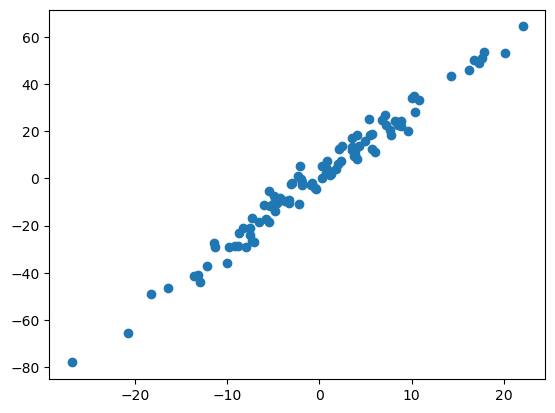

In [39]:
# adding noise
m = 100
X = np.random.randn(m) * 10
noise = np.random.randn(m)
Y = 3*X + 1 + 4* noise   # multiplying noise by 4 to make the graph clear so that we can see the noise

plt.scatter(X,Y)
plt.show()

In [16]:
# you can see that in the above graph the line is not straight when compared to the previous graph. This is because of the added noise.

In [40]:
# making this a function

def generateDataset(m):
    X = np.random.randn(m) * 10
    noise = np.random.randn(m)
    y = 3*X + 1 + 4* noise 
    return X,y

In [41]:
X,y = generateDataset(100)
print(X.shape, Y.shape)

(100,) (100,)


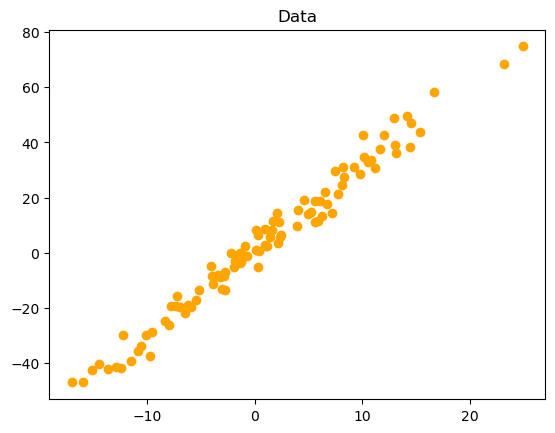

In [42]:
def plotData(X,y, color="orange", title="Data"):
    plt.title(title)
    plt.scatter(X,y,c=color)
    plt.show()

plotData(X,y)

In [26]:
# Linear regression - Data Normalization

In [43]:
def normaliseData(X):
    X = (X-X.mean())/X.std()
    return X

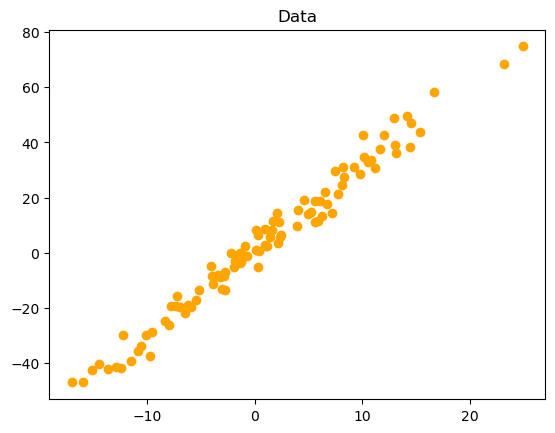

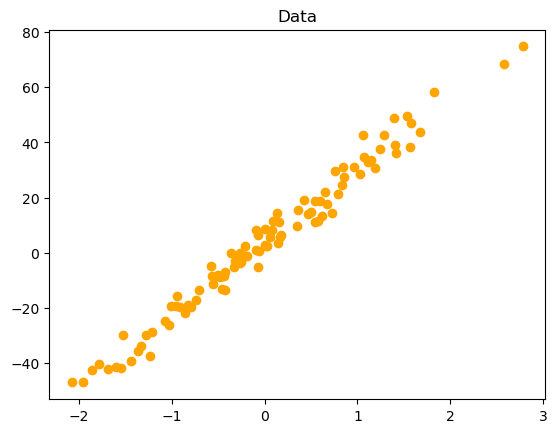

In [44]:
# without normalization
plotData(X,y)

# with normalization
X = normaliseData(X)
plotData(X,y)

In [45]:
# check the x-axis of the above 2 graph.